In [13]:
"""
PLAN (BabI task 1)

given input:
- fact 1   | John travelled to the hallway.
- fact 2   | Mary journeyed to the bathroom.
- question | Where is John?

output:
- answer   | hallway
"""

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', ExtraTreesClassifier()),
#     ('clf', RandomForestClassifier()),
])

parameters = {
    'bow__stop_words': ['english', None],
    'clf__n_estimators': [10, 50, 100, 200],
    'clf__criterion': ['gini', 'entropy'],
#     'clf__max_depth': range(1, 20),
#     'clf__max_features': range(1, 20),
}

import pandas as pd
from parse_dataset import parse_data

df_train = parse_data('/Users/enrico.t/code/ml-reference-implementations/data/babI/tasks_1-20_v1-2/en/qa1_single-supporting-fact_train.txt')
X_train = df_train['fact1'] + ' ' + df_train['fact2'] + ' ' + df_train['question']
y_train = df_train['answer']

df_test = parse_data('/Users/enrico.t/code/ml-reference-implementations/data/babI/tasks_1-20_v1-2/en/qa1_single-supporting-fact_train.txt')
X_test = df_test['fact1'] + ' ' + df_test['fact2'] + ' ' + df_test['question']
y_test = df_test['answer']

model = GridSearchCV(
    pipeline, 
    parameters, 
    cv=5,
    n_jobs=-1, 
    verbose=1
)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print model.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   30.2s finished
/Users/enrico.t/code/ml-reference-implementations/venv/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'clf__criterion': 'entropy', 'clf__n_estimators': 200, 'bow__stop_words': None}


Confusion Matrix:

Predicted  bathroom  bedroom  garden  hallway  kitchen  office  __all__
Actual                                                                 
bathroom        153        0       1        0        0       0      154
bedroom           2      151       0        0        1       1      155
garden            6        3     168        0        0       0      177
hallway           3        5       4      163        0       0      175
kitchen           1        3       4        3      162       0      173
office            2        1       4        3        2     154      166
__all__         167      163     181      169      165     155     1000


Overall Statistics:

Accuracy: 0.951
95% CI: (0.9357339468598277, 0.9635329408279537)
No Information Rate: ToDo
P-Value [Acc > NIR]: 0.0
Kappa: 0.9411856492984287
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                  bathroom     bedroom     garden  \
Population                                

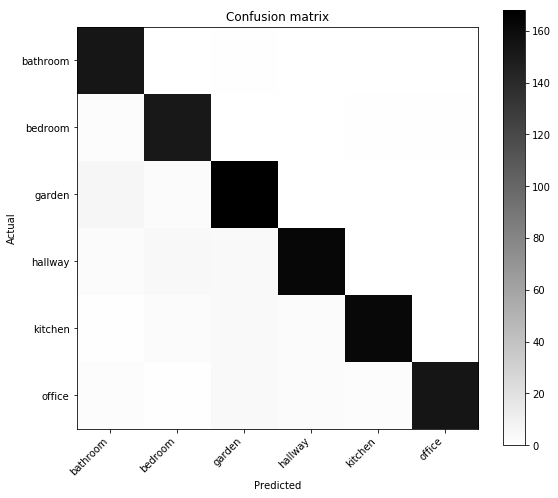

In [14]:
from pandas_ml import ConfusionMatrix

cm = ConfusionMatrix(y_test, y_predict)
cm.print_stats()
print cm.plot()